In [1]:
import params
import curveTreeDB
from google.cloud import datastore, storage, logging
import time
import pickle

In [2]:
def getDiscoveredPortfolios():
    while True:
        try:
            datastore_client = datastore.Client('money-maker-1236')
            query = datastore_client.query(kind=params.discoveredPortfolios)
            retrievedModels = list(query.fetch())
            return retrievedModels
        except:
            time.sleep(10)
            print("DATA SOURCE RETRIEVAL ERROR:", str(sys.exc_info()))

In [3]:
portfolios = getDiscoveredPortfolios()

In [4]:
len(portfolios)

70

In [5]:
import pandas as pd
cleanedModels = []
for item in portfolios:
    try:
        print(item["IS_profitability"])
    except:
        continue
    if item["IS_profitability"] < 0.55:
        continue
    if item["portfolioType"].startswith("HRP") == False:
        continue
    if item["ALGORITHMS TRADED"] < 500:
        continue
    newItem = {}
    for key in item:
        newItem[key] = item[key]
    
    itemKeys= list(newItem.keys())
    tickers = []
    for key in itemKeys:
        
        if (key.startswith("OOS") and key != "OOS_profitability" and key != "OOS_annualizedReturn" \
            and key != "OOS_free return" and key != "OOS_annualizedVolatility" and key != "OOS_beta"):
            del newItem[key]
        if len(key) == 3 or key == "SOXX" or key == "benchmark" or key == "IS_benchmark":
            del newItem[key]
            if len(key) == 3 or key == "SOXX":
                tickers.append(key)
    newItem["key"] = item.key.name
    newItem["tickers"] = tickers
    cleanedModels.append(newItem)


0.5467667436489607
0.5649081209247184
0.5467667436489607
0.5444572748267898
0.5525404157043879
0.5515463917525774
0.5624249699879952
0.5554272517321016
0.563615428900403
0.5554272517321016
0.5600461893764435
0.5583140877598153
0.5634458672875436
0.5577367205542725
0.5538284398388025
0.5508083140877598
0.5626410835214447
0.5508083140877598
0.549343981745579
0.5538373424971363
0.5605355064027939
0.5611428571428572
0.544151376146789
0.5525404157043879
0.5536951501154734
0.5467263570229435
0.5601825442099259
0.5582857142857143
0.5531177829099307
0.5513856812933026
0.5576251455180442
0.5525404157043879
0.5542725173210161
0.5545505935556811
0.5450346420323325
0.5583140877598153
0.558891454965358
0.5669383003492433
0.5548498845265589
0.5646100116414435
0.5492227979274611
0.5598870056497175
0.5606235565819861
0.5542725173210161
0.5594688221709007
0.5513856812933026
0.5549828178694158
0.5544041450777202
0.5490762124711316
0.548
0.5521013241220495
0.5386836027713626
0.5514285714285714
0.55843408

In [6]:
cleanedModels[0]


{'ALGORITHMS TRADED': 642,
 'IS_alpha': 0.13380100135728631,
 'IS_annualizedReturn': 0.2595327191932695,
 'IS_annualizedVolatility': 0.16821537312105758,
 'IS_beta': 0.7815984342913594,
 'IS_free return': 0.0913173460722119,
 'IS_monthlyMinimum': -0.16052155940369295,
 'IS_profitability': 0.5525404157043879,
 'IS_rollingSharpeError': 0.9104690582330328,
 'IS_rollingSharpeMinimum': -0.6389022552643706,
 'IS_sharpe': 1.4564486476987661,
 'IS_sharpe difference': 0.9993945206117951,
 'IS_stability': 0.9447013032558566,
 'IS_weeklyMinimum': -0.10042124301452471,
 'IS_yearlyMinimum': -0.17805167486175277,
 'OOS_annualizedReturn': 0.2036561639950376,
 'OOS_annualizedVolatility': 0.13088606428312272,
 'OOS_beta': 1.2854288478153122,
 'OOS_free return': 0.07277009971191489,
 'OOS_profitability': 0.5515873015873016,
 'TICKERS TRADED': 28,
 'VO': True,
 'description': 'AUTO GENERATED',
 'key': '161e7fc3d9e70151f270de94c613503f4a2d9d7d2ce46f424bb7137d',
 'portfolioType': 'HRP BINARY',
 'startedTra

ALGORITHMS TRADED
512    0.571429
529    0.551587
535    0.563492
542    0.555556
552    0.575397
576    0.563492
593    0.559524
594    0.543651
615    0.563492
620    0.551587
621    0.559524
642    0.551587
680    0.555556
682    0.563492
697    0.563492
698    0.559524
700    0.563492
Name: OOS_profitability, dtype: float64
ALGORITHMS TRADED
512    0.158254
529    0.116972
535    0.225163
542    0.132448
552    0.217865
576    0.198179
593    0.216849
594    0.200766
615    0.208217
620    0.225113
621    0.185473
642    0.203656
680    0.180061
682    0.197652
697    0.169809
698    0.177534
700    0.201945
Name: OOS_annualizedReturn, dtype: float64
ALGORITHMS TRADED
512    0.028873
529    0.013854
535    0.106120
542    0.029580
552    0.104052
576    0.082518
593    0.084827
594    0.063264
615    0.084371
620    0.090855
621    0.075031
642    0.072770
680    0.072287
682    0.070805
697    0.064930
698    0.071387
700    0.076690
Name: OOS_free return, dtype: float64
ALGORITHM

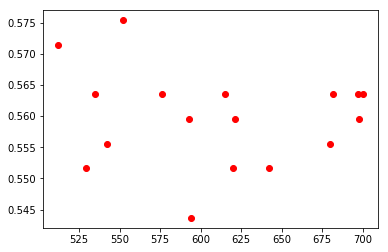

ALGORITHMS TRADED OOS_annualizedReturn


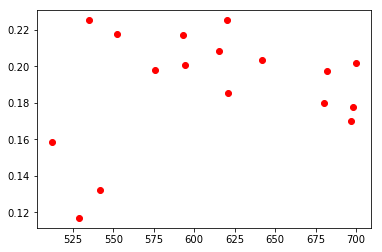

ALGORITHMS TRADED OOS_free return


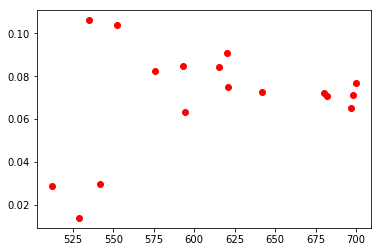

IS_alpha
0.103512    0.555556
0.105817    0.551587
0.116903    0.563492
0.119221    0.571429
0.119334    0.563492
0.124244    0.559524
0.124622    0.551587
0.129158    0.563492
0.130730    0.563492
0.131164    0.555556
0.132368    0.563492
0.133495    0.543651
0.133801    0.551587
0.138643    0.559524
0.140464    0.575397
0.151608    0.563492
0.152794    0.559524
Name: OOS_profitability, dtype: float64
IS_alpha
0.103512    0.132448
0.105817    0.116972
0.116903    0.201945
0.119221    0.158254
0.119334    0.169809
0.124244    0.177534
0.124622    0.225113
0.129158    0.197652
0.130730    0.208217
0.131164    0.180061
0.132368    0.198179
0.133495    0.200766
0.133801    0.203656
0.138643    0.216849
0.140464    0.217865
0.151608    0.225163
0.152794    0.185473
Name: OOS_annualizedReturn, dtype: float64
IS_alpha
0.103512    0.029580
0.105817    0.013854
0.116903    0.076690
0.119221    0.028873
0.119334    0.064930
0.124244    0.071387
0.124622    0.090855
0.129158    0.070805
0.130730

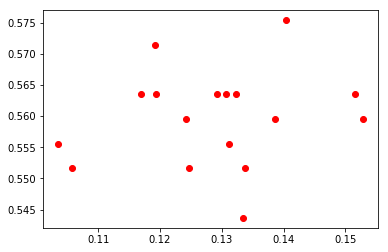

IS_alpha OOS_annualizedReturn


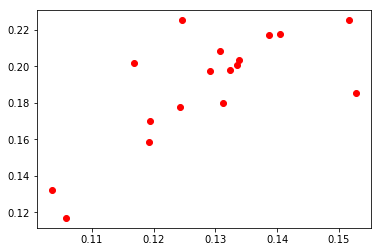

IS_alpha OOS_free return


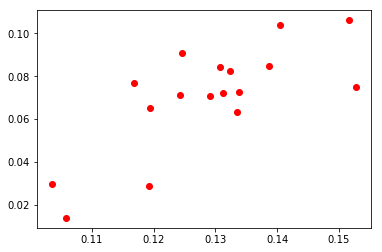

IS_annualizedReturn
0.220674    0.555556
0.224766    0.551587
0.238670    0.563492
0.240175    0.571429
0.242354    0.563492
0.247312    0.559524
0.251017    0.551587
0.251577    0.563492
0.252751    0.563492
0.254422    0.555556
0.259533    0.551587
0.261805    0.563492
0.263046    0.559524
0.263663    0.575397
0.266065    0.543651
0.275332    0.563492
0.280640    0.559524
Name: OOS_profitability, dtype: float64
IS_annualizedReturn
0.220674    0.132448
0.224766    0.116972
0.238670    0.201945
0.240175    0.158254
0.242354    0.169809
0.247312    0.177534
0.251017    0.225113
0.251577    0.208217
0.252751    0.197652
0.254422    0.180061
0.259533    0.203656
0.261805    0.198179
0.263046    0.216849
0.263663    0.217865
0.266065    0.200766
0.275332    0.225163
0.280640    0.185473
Name: OOS_annualizedReturn, dtype: float64
IS_annualizedReturn
0.220674    0.029580
0.224766    0.013854
0.238670    0.076690
0.240175    0.028873
0.242354    0.064930
0.247312    0.071387
0.251017    0.090

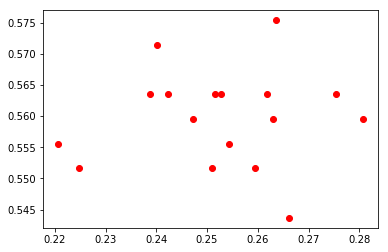

IS_annualizedReturn OOS_annualizedReturn


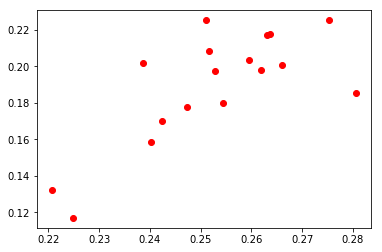

IS_annualizedReturn OOS_free return


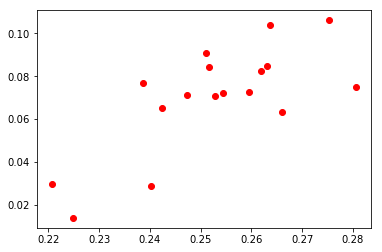

IS_annualizedVolatility
0.150807    0.555556
0.152369    0.551587
0.158248    0.563492
0.158577    0.555556
0.158859    0.559524
0.161100    0.563492
0.161792    0.563492
0.161806    0.571429
0.163113    0.563492
0.164639    0.559524
0.165891    0.575397
0.165980    0.563492
0.168215    0.551587
0.168754    0.563492
0.170457    0.551587
0.171509    0.559524
0.173493    0.543651
Name: OOS_profitability, dtype: float64
IS_annualizedVolatility
0.150807    0.132448
0.152369    0.116972
0.158248    0.169809
0.158577    0.180061
0.158859    0.177534
0.161100    0.208217
0.161792    0.201945
0.161806    0.158254
0.163113    0.197652
0.164639    0.185473
0.165891    0.217865
0.165980    0.198179
0.168215    0.203656
0.168754    0.225163
0.170457    0.225113
0.171509    0.216849
0.173493    0.200766
Name: OOS_annualizedReturn, dtype: float64
IS_annualizedVolatility
0.150807    0.029580
0.152369    0.013854
0.158248    0.064930
0.158577    0.072287
0.158859    0.071387
0.161100    0.084371
0.161

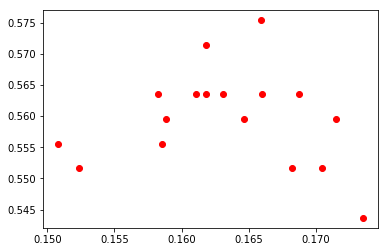

IS_annualizedVolatility OOS_annualizedReturn


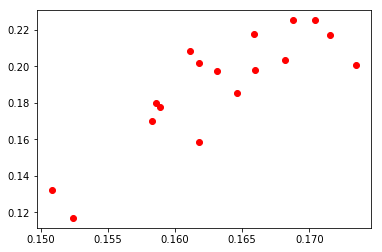

IS_annualizedVolatility OOS_free return


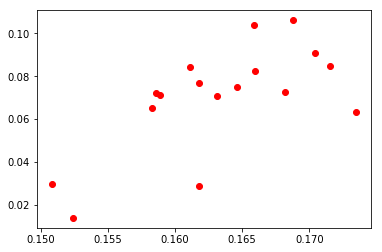

IS_beta
0.728556    0.563492
0.750348    0.563492
0.751745    0.571429
0.754519    0.555556
0.754997    0.575397
0.760434    0.555556
0.760788    0.559524
0.763514    0.551587
0.769401    0.559524
0.770309    0.563492
0.771084    0.559524
0.775204    0.563492
0.775412    0.563492
0.781598    0.551587
0.801078    0.551587
0.801685    0.563492
0.808530    0.543651
Name: OOS_profitability, dtype: float64
IS_beta
0.728556    0.225163
0.750348    0.208217
0.751745    0.158254
0.754519    0.132448
0.754997    0.217865
0.760434    0.180061
0.760788    0.185473
0.763514    0.116972
0.769401    0.177534
0.770309    0.197652
0.771084    0.216849
0.775204    0.169809
0.775412    0.201945
0.781598    0.203656
0.801078    0.225113
0.801685    0.198179
0.808530    0.200766
Name: OOS_annualizedReturn, dtype: float64
IS_beta
0.728556    0.106120
0.750348    0.084371
0.751745    0.028873
0.754519    0.029580
0.754997    0.104052
0.760434    0.072287
0.760788    0.075031
0.763514    0.013854
0.769401   

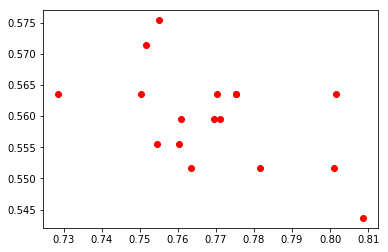

IS_beta OOS_annualizedReturn


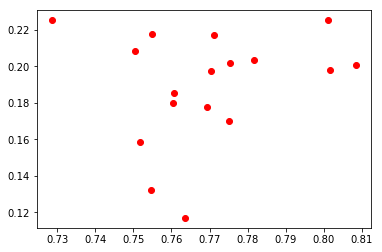

IS_beta OOS_free return


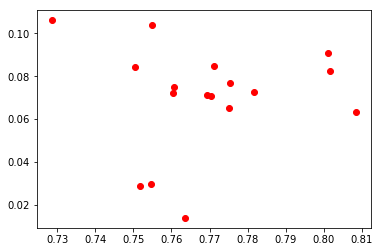

IS_free return
0.069867    0.555556
0.072398    0.551587
0.076877    0.563492
0.078369    0.571429
0.080560    0.551587
0.084106    0.563492
0.088453    0.559524
0.089637    0.563492
0.090476    0.563492
0.091317    0.551587
0.091537    0.559524
0.092572    0.543651
0.095825    0.563492
0.095845    0.555556
0.097772    0.575397
0.106578    0.563492
0.116001    0.559524
Name: OOS_profitability, dtype: float64
IS_free return
0.069867    0.132448
0.072398    0.116972
0.076877    0.201945
0.078369    0.158254
0.080560    0.225113
0.084106    0.169809
0.088453    0.177534
0.089637    0.197652
0.090476    0.208217
0.091317    0.203656
0.091537    0.216849
0.092572    0.200766
0.095825    0.198179
0.095845    0.180061
0.097772    0.217865
0.106578    0.225163
0.116001    0.185473
Name: OOS_annualizedReturn, dtype: float64
IS_free return
0.069867    0.029580
0.072398    0.013854
0.076877    0.076690
0.078369    0.028873
0.080560    0.090855
0.084106    0.064930
0.088453    0.071387
0.089637   

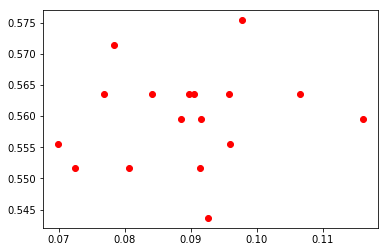

IS_free return OOS_annualizedReturn


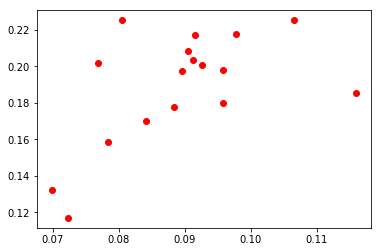

IS_free return OOS_free return


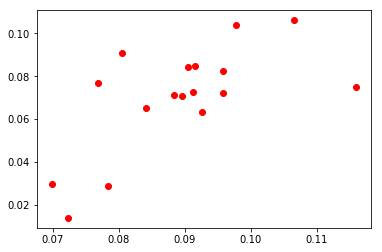

IS_monthlyMinimum
-0.165898    0.543651
-0.163520    0.571429
-0.160814    0.551587
-0.160522    0.551587
-0.157088    0.559524
-0.152218    0.563492
-0.151618    0.563492
-0.149418    0.563492
-0.143143    0.563492
-0.136007    0.559524
-0.135710    0.575397
-0.135377    0.563492
-0.131127    0.551587
-0.129083    0.559524
-0.126587    0.555556
-0.126465    0.555556
-0.125434    0.563492
Name: OOS_profitability, dtype: float64
IS_monthlyMinimum
-0.165898    0.200766
-0.163520    0.158254
-0.160814    0.225113
-0.160522    0.203656
-0.157088    0.216849
-0.152218    0.197652
-0.151618    0.208217
-0.149418    0.201945
-0.143143    0.225163
-0.136007    0.185473
-0.135710    0.217865
-0.135377    0.198179
-0.131127    0.116972
-0.129083    0.177534
-0.126587    0.180061
-0.126465    0.132448
-0.125434    0.169809
Name: OOS_annualizedReturn, dtype: float64
IS_monthlyMinimum
-0.165898    0.063264
-0.163520    0.028873
-0.160814    0.090855
-0.160522    0.072770
-0.157088    0.084827
-0.15

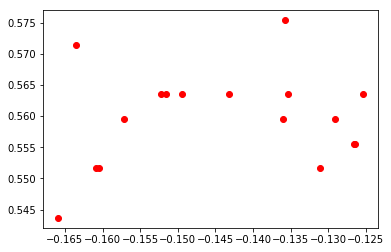

IS_monthlyMinimum OOS_annualizedReturn


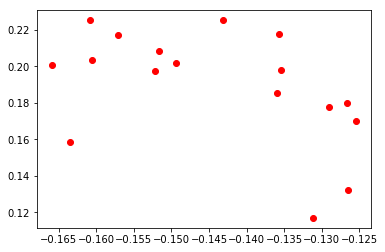

IS_monthlyMinimum OOS_free return


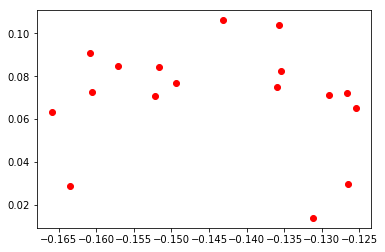

IS_profitability
0.550808    0.561508
0.551386    0.557540
0.552540    0.555556
0.553118    0.575397
0.553695    0.551587
0.553828    0.563492
0.554850    0.563492
0.555427    0.557540
0.555556    0.543651
0.557737    0.563492
0.558286    0.571429
0.559469    0.563492
Name: OOS_profitability, dtype: float64
IS_profitability
0.550808    0.187856
0.551386    0.174649
0.552540    0.199526
0.553118    0.217865
0.553695    0.116972
0.553828    0.225163
0.554850    0.197652
0.555427    0.182767
0.555556    0.200766
0.557737    0.201945
0.558286    0.158254
0.559469    0.208217
Name: OOS_annualizedReturn, dtype: float64
IS_profitability
0.550808    0.076952
0.551386    0.057203
0.552540    0.076185
0.553118    0.104052
0.553695    0.013854
0.553828    0.106120
0.554850    0.070805
0.555427    0.073659
0.555556    0.063264
0.557737    0.076690
0.558286    0.028873
0.559469    0.084371
Name: OOS_free return, dtype: float64
IS_profitability OOS_profitability


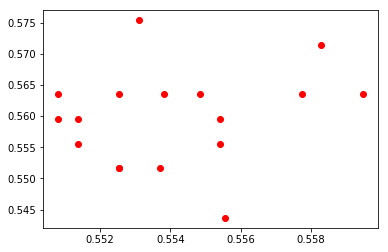

IS_profitability OOS_annualizedReturn


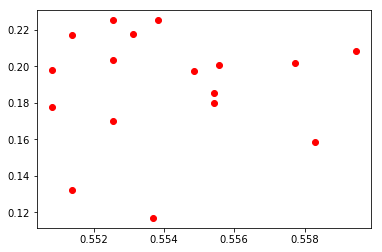

IS_profitability OOS_free return


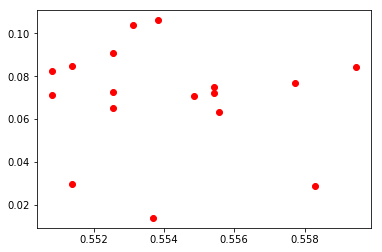

IS_rollingSharpeError
0.792367    0.551587
0.806715    0.571429
0.817056    0.555556
0.869955    0.543651
0.878200    0.563492
0.880162    0.559524
0.886271    0.563492
0.895567    0.563492
0.910469    0.551587
0.910576    0.551587
0.917063    0.563492
0.924763    0.555556
0.925579    0.559524
0.932001    0.563492
0.949477    0.575397
0.977837    0.559524
1.044770    0.563492
Name: OOS_profitability, dtype: float64
IS_rollingSharpeError
0.792367    0.116972
0.806715    0.158254
0.817056    0.132448
0.869955    0.200766
0.878200    0.201945
0.880162    0.216849
0.886271    0.169809
0.895567    0.198179
0.910469    0.203656
0.910576    0.225113
0.917063    0.197652
0.924763    0.180061
0.925579    0.177534
0.932001    0.208217
0.949477    0.217865
0.977837    0.185473
1.044770    0.225163
Name: OOS_annualizedReturn, dtype: float64
IS_rollingSharpeError
0.792367    0.013854
0.806715    0.028873
0.817056    0.029580
0.869955    0.063264
0.878200    0.076690
0.880162    0.084827
0.886271   

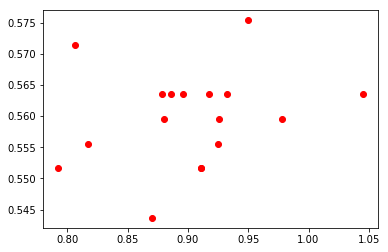

IS_rollingSharpeError OOS_annualizedReturn


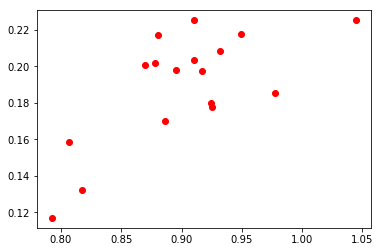

IS_rollingSharpeError OOS_free return


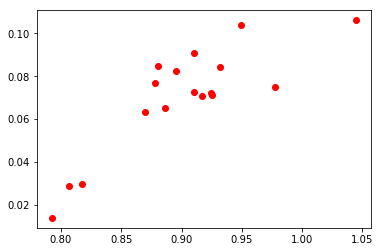

IS_rollingSharpeMinimum
-0.685891    0.571429
-0.650730    0.559524
-0.645785    0.551587
-0.638902    0.551587
-0.634817    0.563492
-0.632521    0.551587
-0.628655    0.575397
-0.625600    0.563492
-0.625207    0.543651
-0.622206    0.563492
-0.616265    0.563492
-0.610780    0.555556
-0.609897    0.555556
-0.593757    0.563492
-0.590746    0.559524
-0.579234    0.559524
-0.570420    0.563492
Name: OOS_profitability, dtype: float64
IS_rollingSharpeMinimum
-0.685891    0.158254
-0.650730    0.216849
-0.645785    0.225113
-0.638902    0.203656
-0.634817    0.208217
-0.632521    0.116972
-0.628655    0.217865
-0.625600    0.197652
-0.625207    0.200766
-0.622206    0.225163
-0.616265    0.201945
-0.610780    0.180061
-0.609897    0.132448
-0.593757    0.198179
-0.590746    0.185473
-0.579234    0.177534
-0.570420    0.169809
Name: OOS_annualizedReturn, dtype: float64
IS_rollingSharpeMinimum
-0.685891    0.028873
-0.650730    0.084827
-0.645785    0.090855
-0.638902    0.072770
-0.634817

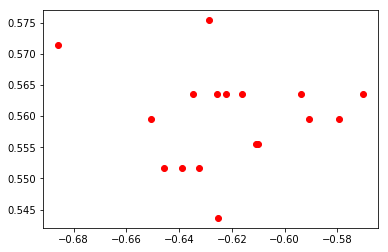

IS_rollingSharpeMinimum OOS_annualizedReturn


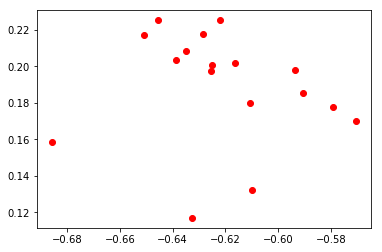

IS_rollingSharpeMinimum OOS_free return


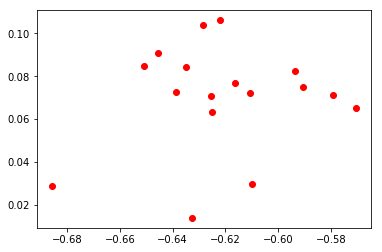

IS_sharpe
1.398183    0.555556
1.399707    0.551587
1.404384    0.563492
1.407378    0.551587
1.411819    0.571429
1.447185    0.543651
1.447991    0.559524
1.451016    0.563492
1.456449    0.551587
1.463694    0.563492
1.471141    0.559524
1.474115    0.563492
1.484649    0.563492
1.494211    0.575397
1.509351    0.555556
1.526241    0.563492
1.585464    0.559524
Name: OOS_profitability, dtype: float64
IS_sharpe
1.398183    0.132448
1.399707    0.225113
1.404384    0.201945
1.407378    0.116972
1.411819    0.158254
1.447185    0.200766
1.447991    0.216849
1.451016    0.169809
1.456449    0.203656
1.463694    0.197652
1.471141    0.177534
1.474115    0.208217
1.484649    0.198179
1.494211    0.217865
1.509351    0.180061
1.526241    0.225163
1.585464    0.185473
Name: OOS_annualizedReturn, dtype: float64
IS_sharpe
1.398183    0.029580
1.399707    0.090855
1.404384    0.076690
1.407378    0.013854
1.411819    0.028873
1.447185    0.063264
1.447991    0.084827
1.451016    0.064930
1.456

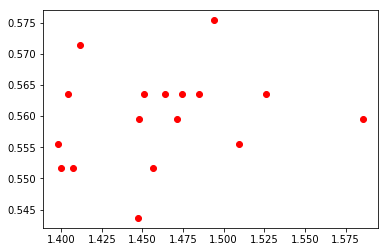

IS_sharpe OOS_annualizedReturn


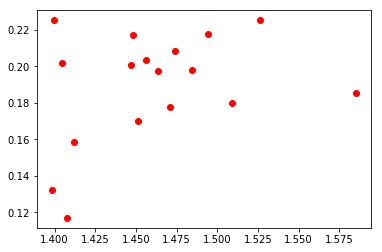

IS_sharpe OOS_free return


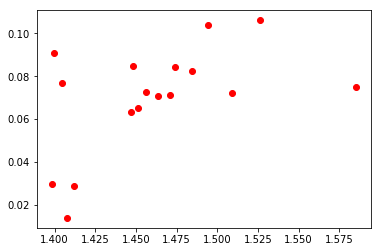

IS_sharpe difference
0.941129    0.555556
0.942653    0.551587
0.947330    0.563492
0.950324    0.551587
0.954765    0.571429
0.990131    0.543651
0.990937    0.559524
0.993962    0.563492
0.999395    0.551587
1.006640    0.563492
1.014087    0.559524
1.017061    0.563492
1.027594    0.563492
1.037157    0.575397
1.052297    0.555556
1.069186    0.563492
1.128410    0.559524
Name: OOS_profitability, dtype: float64
IS_sharpe difference
0.941129    0.132448
0.942653    0.225113
0.947330    0.201945
0.950324    0.116972
0.954765    0.158254
0.990131    0.200766
0.990937    0.216849
0.993962    0.169809
0.999395    0.203656
1.006640    0.197652
1.014087    0.177534
1.017061    0.208217
1.027594    0.198179
1.037157    0.217865
1.052297    0.180061
1.069186    0.225163
1.128410    0.185473
Name: OOS_annualizedReturn, dtype: float64
IS_sharpe difference
0.941129    0.029580
0.942653    0.090855
0.947330    0.076690
0.950324    0.013854
0.954765    0.028873
0.990131    0.063264
0.990937    0.

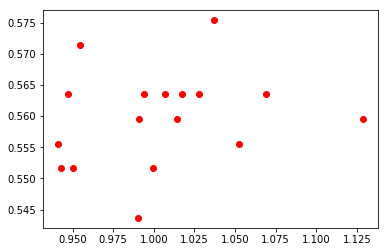

IS_sharpe difference OOS_annualizedReturn


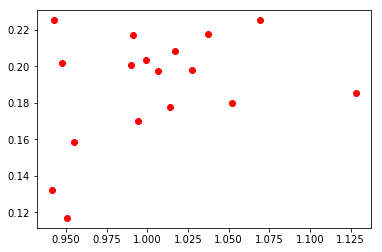

IS_sharpe difference OOS_free return


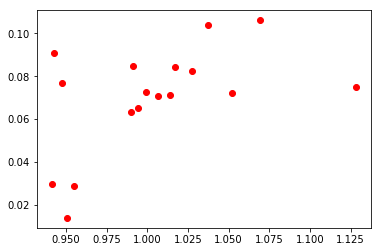

IS_stability
0.921188    0.563492
0.928667    0.575397
0.931829    0.559524
0.934801    0.563492
0.935818    0.555556
0.938890    0.559524
0.941422    0.563492
0.941669    0.559524
0.942722    0.563492
0.942973    0.563492
0.943496    0.551587
0.944701    0.551587
0.945517    0.555556
0.946734    0.543651
0.946937    0.551587
0.947191    0.563492
0.954699    0.571429
Name: OOS_profitability, dtype: float64
IS_stability
0.921188    0.225163
0.928667    0.217865
0.931829    0.185473
0.934801    0.208217
0.935818    0.180061
0.938890    0.177534
0.941422    0.169809
0.941669    0.216849
0.942722    0.197652
0.942973    0.198179
0.943496    0.225113
0.944701    0.203656
0.945517    0.132448
0.946734    0.200766
0.946937    0.116972
0.947191    0.201945
0.954699    0.158254
Name: OOS_annualizedReturn, dtype: float64
IS_stability
0.921188    0.106120
0.928667    0.104052
0.931829    0.075031
0.934801    0.084371
0.935818    0.072287
0.938890    0.071387
0.941422    0.064930
0.941669    0.084

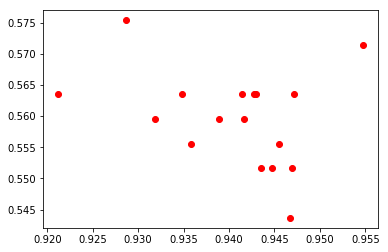

IS_stability OOS_annualizedReturn


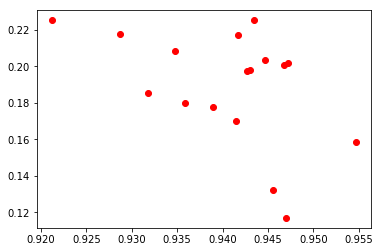

IS_stability OOS_free return


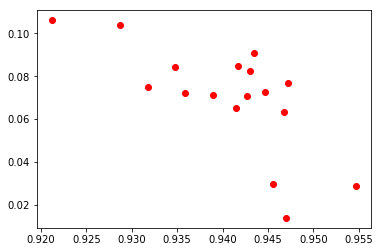

IS_weeklyMinimum
-0.107010    0.551587
-0.104557    0.559524
-0.102053    0.563492
-0.101883    0.543651
-0.101541    0.559524
-0.101028    0.551587
-0.100984    0.555556
-0.100861    0.555556
-0.100469    0.559524
-0.100421    0.551587
-0.100045    0.563492
-0.100035    0.563492
-0.100006    0.563492
-0.099675    0.575397
-0.099630    0.563492
-0.097497    0.563492
-0.096869    0.571429
Name: OOS_profitability, dtype: float64
IS_weeklyMinimum
-0.107010    0.225113
-0.104557    0.216849
-0.102053    0.198179
-0.101883    0.200766
-0.101541    0.185473
-0.101028    0.116972
-0.100984    0.180061
-0.100861    0.132448
-0.100469    0.177534
-0.100421    0.203656
-0.100045    0.225163
-0.100035    0.201945
-0.100006    0.169809
-0.099675    0.217865
-0.099630    0.197652
-0.097497    0.208217
-0.096869    0.158254
Name: OOS_annualizedReturn, dtype: float64
IS_weeklyMinimum
-0.107010    0.090855
-0.104557    0.084827
-0.102053    0.082518
-0.101883    0.063264
-0.101541    0.075031
-0.10102

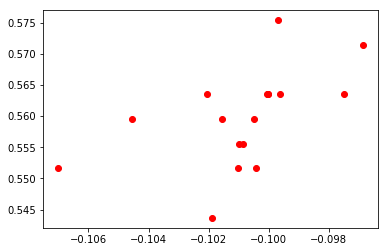

IS_weeklyMinimum OOS_annualizedReturn


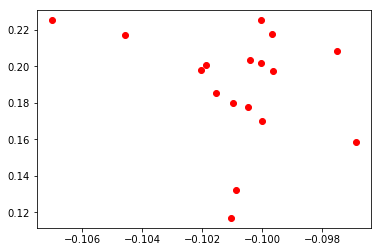

IS_weeklyMinimum OOS_free return


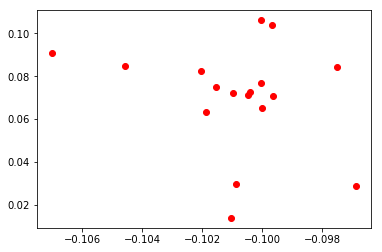

IS_yearlyMinimum
-0.186282    0.551587
-0.185236    0.559524
-0.182572    0.571429
-0.178259    0.543651
-0.178052    0.551587
-0.173384    0.563492
-0.172448    0.563492
-0.170967    0.563492
-0.169988    0.563492
-0.168062    0.575397
-0.164592    0.563492
-0.162622    0.559524
-0.161879    0.551587
-0.161234    0.555556
-0.158324    0.559524
-0.157484    0.555556
-0.154719    0.563492
Name: OOS_profitability, dtype: float64
IS_yearlyMinimum
-0.186282    0.225113
-0.185236    0.216849
-0.182572    0.158254
-0.178259    0.200766
-0.178052    0.203656
-0.173384    0.208217
-0.172448    0.197652
-0.170967    0.225163
-0.169988    0.201945
-0.168062    0.217865
-0.164592    0.198179
-0.162622    0.185473
-0.161879    0.116972
-0.161234    0.180061
-0.158324    0.177534
-0.157484    0.132448
-0.154719    0.169809
Name: OOS_annualizedReturn, dtype: float64
IS_yearlyMinimum
-0.186282    0.090855
-0.185236    0.084827
-0.182572    0.028873
-0.178259    0.063264
-0.178052    0.072770
-0.17338

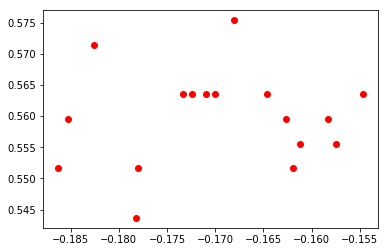

IS_yearlyMinimum OOS_annualizedReturn


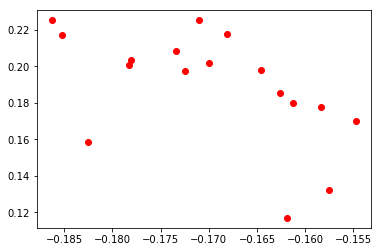

IS_yearlyMinimum OOS_free return


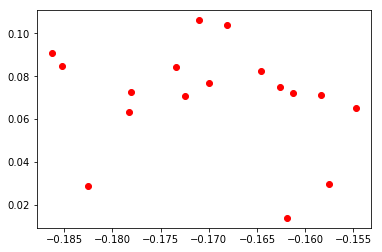

OOS_annualizedReturn
0.116972    0.551587
0.132448    0.555556
0.158254    0.571429
0.169809    0.563492
0.177534    0.559524
0.180061    0.555556
0.185473    0.559524
0.197652    0.563492
0.198179    0.563492
0.200766    0.543651
0.201945    0.563492
0.203656    0.551587
0.208217    0.563492
0.216849    0.559524
0.217865    0.575397
0.225113    0.551587
0.225163    0.563492
Name: OOS_profitability, dtype: float64
OOS_annualizedReturn
0.116972    0.116972
0.132448    0.132448
0.158254    0.158254
0.169809    0.169809
0.177534    0.177534
0.180061    0.180061
0.185473    0.185473
0.197652    0.197652
0.198179    0.198179
0.200766    0.200766
0.201945    0.201945
0.203656    0.203656
0.208217    0.208217
0.216849    0.216849
0.217865    0.217865
0.225113    0.225113
0.225163    0.225163
Name: OOS_annualizedReturn, dtype: float64
OOS_annualizedReturn
0.116972    0.013854
0.132448    0.029580
0.158254    0.028873
0.169809    0.064930
0.177534    0.071387
0.180061    0.072287
0.185473    0.

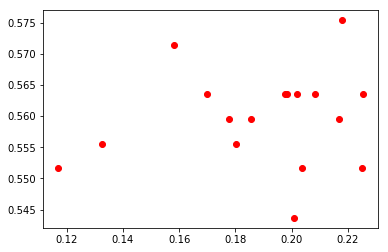

OOS_annualizedReturn OOS_annualizedReturn


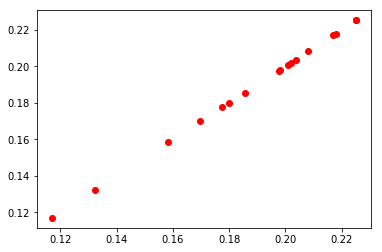

OOS_annualizedReturn OOS_free return


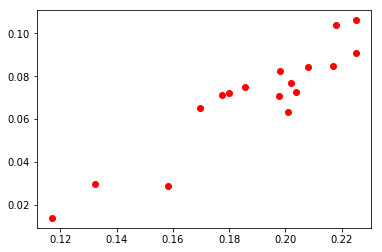

OOS_annualizedVolatility
0.102869    0.555556
0.103119    0.551587
0.104880    0.563492
0.106147    0.559524
0.107774    0.555556
0.110442    0.559524
0.113813    0.575397
0.115661    0.563492
0.119043    0.563492
0.123846    0.563492
0.125256    0.563492
0.126847    0.563492
0.129381    0.571429
0.130886    0.551587
0.132023    0.559524
0.134257    0.551587
0.137502    0.543651
Name: OOS_profitability, dtype: float64
OOS_annualizedVolatility
0.102869    0.132448
0.103119    0.116972
0.104880    0.169809
0.106147    0.177534
0.107774    0.180061
0.110442    0.185473
0.113813    0.217865
0.115661    0.198179
0.119043    0.225163
0.123846    0.208217
0.125256    0.201945
0.126847    0.197652
0.129381    0.158254
0.130886    0.203656
0.132023    0.216849
0.134257    0.225113
0.137502    0.200766
Name: OOS_annualizedReturn, dtype: float64
OOS_annualizedVolatility
0.102869    0.029580
0.103119    0.013854
0.104880    0.064930
0.106147    0.071387
0.107774    0.072287
0.110442    0.075031
0.

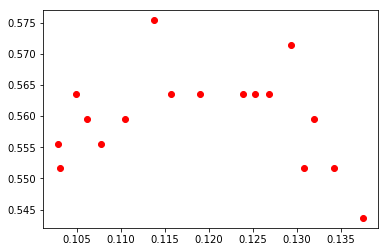

OOS_annualizedVolatility OOS_annualizedReturn


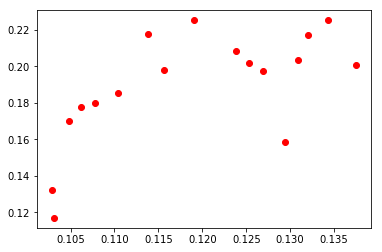

OOS_annualizedVolatility OOS_free return
OOS_beta
1.122285    0.551587
1.125766    0.555556
1.150240    0.563492
1.166352    0.559524
1.179730    0.555556
1.186717    0.559524
1.210192    0.575397
1.219689    0.571429
1.229100    0.563492
1.246688    0.563492
1.252692    0.563492
1.256865    0.563492
1.264017    0.563492
1.285429    0.551587
1.289314    0.543651
1.323834    0.559524
1.331165    0.551587
Name: OOS_profitability, dtype: float64
OOS_beta
1.122285    0.116972
1.125766    0.132448
1.150240    0.169809
1.166352    0.177534
1.179730    0.180061
1.186717    0.185473
1.210192    0.217865
1.219689    0.158254
1.229100    0.198179
1.246688    0.208217
1.252692    0.225163
1.256865    0.201945
1.264017    0.197652
1.285429    0.203656
1.289314    0.200766
1.323834    0.216849
1.331165    0.225113
Name: OOS_annualizedReturn, dtype: float64
OOS_beta
1.122285    0.013854
1.125766    0.029580
1.150240    0.064930
1.166352    0.071387
1.179730    0.072287
1.186717    0.075031
1.210192 

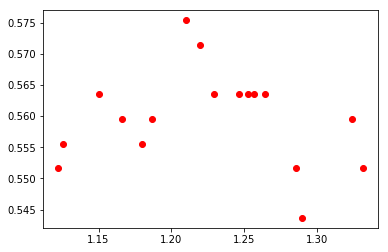

OOS_beta OOS_annualizedReturn


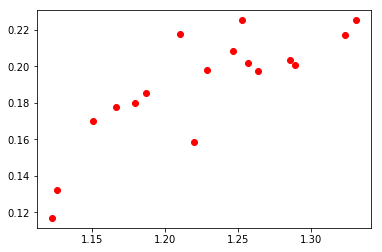

OOS_beta OOS_free return


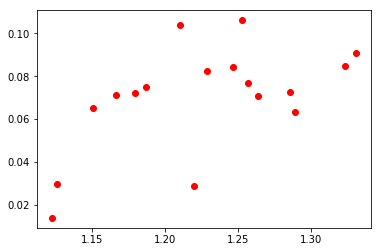

OOS_free return
0.013854    0.551587
0.028873    0.571429
0.029580    0.555556
0.063264    0.543651
0.064930    0.563492
0.070805    0.563492
0.071387    0.559524
0.072287    0.555556
0.072770    0.551587
0.075031    0.559524
0.076690    0.563492
0.082518    0.563492
0.084371    0.563492
0.084827    0.559524
0.090855    0.551587
0.104052    0.575397
0.106120    0.563492
Name: OOS_profitability, dtype: float64
OOS_free return
0.013854    0.116972
0.028873    0.158254
0.029580    0.132448
0.063264    0.200766
0.064930    0.169809
0.070805    0.197652
0.071387    0.177534
0.072287    0.180061
0.072770    0.203656
0.075031    0.185473
0.076690    0.201945
0.082518    0.198179
0.084371    0.208217
0.084827    0.216849
0.090855    0.225113
0.104052    0.217865
0.106120    0.225163
Name: OOS_annualizedReturn, dtype: float64
OOS_free return
0.013854    0.013854
0.028873    0.028873
0.029580    0.029580
0.063264    0.063264
0.064930    0.064930
0.070805    0.070805
0.071387    0.071387
0.072287

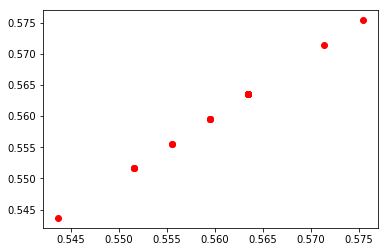

OOS_profitability OOS_annualizedReturn


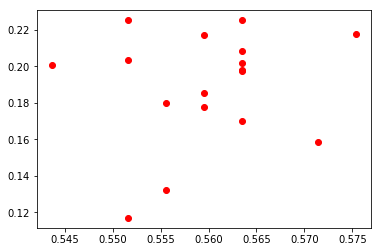

OOS_profitability OOS_free return


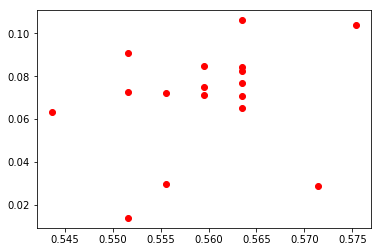

TICKERS TRADED
21    0.563492
22    0.543651
23    0.559524
24    0.566138
27    0.571429
28    0.551587
31    0.551587
32    0.556878
33    0.563492
34    0.563492
35    0.557540
36    0.563492
Name: OOS_profitability, dtype: float64
TICKERS TRADED
21    0.225163
22    0.200766
23    0.185473
24    0.210964
27    0.158254
28    0.203656
31    0.225113
32    0.168417
33    0.169809
34    0.197652
35    0.154991
36    0.201945
Name: OOS_annualizedReturn, dtype: float64
TICKERS TRADED
21    0.106120
22    0.063264
23    0.075031
24    0.090466
27    0.028873
28    0.072770
31    0.090855
32    0.056837
33    0.064930
34    0.070805
35    0.050483
36    0.076690
Name: OOS_free return, dtype: float64
TICKERS TRADED OOS_profitability


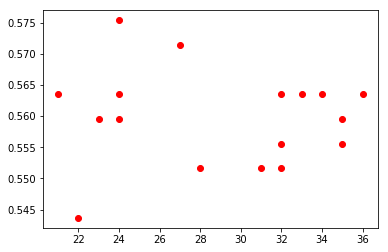

TICKERS TRADED OOS_annualizedReturn


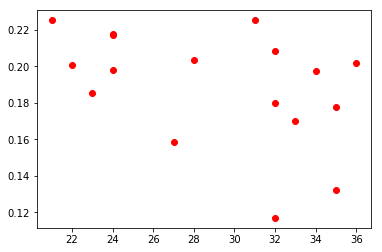

TICKERS TRADED OOS_free return


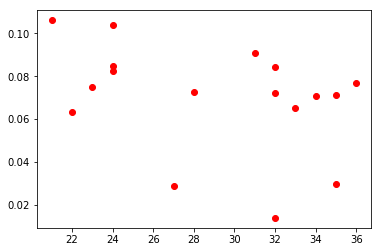

VO
True    0.559807
Name: OOS_profitability, dtype: float64
VO
True    0.187984
Name: OOS_annualizedReturn, dtype: float64
VO
True    0.070997
Name: OOS_free return, dtype: float64
VO OOS_profitability


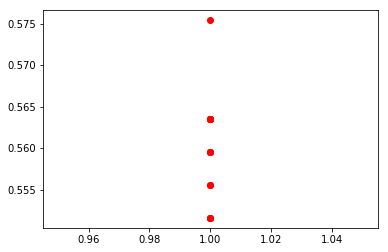

VO OOS_annualizedReturn


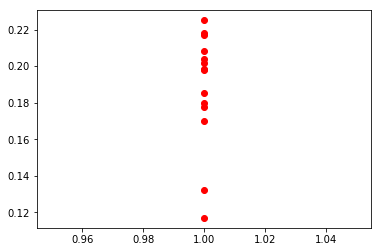

VO OOS_free return


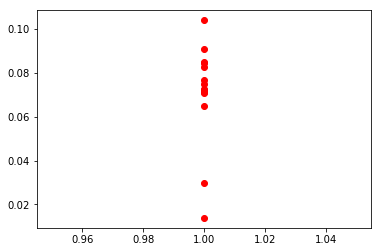

description
AUTO GENERATED    0.559757
Name: OOS_profitability, dtype: float64
description
AUTO GENERATED    0.189174
Name: OOS_annualizedReturn, dtype: float64
description
AUTO GENERATED    0.07013
Name: OOS_free return, dtype: float64
description OOS_profitability
key
161e7fc3d9e70151f270de94c613503f4a2d9d7d2ce46f424bb7137d    0.551587
220ddc0d0290adfaa6355ecb3ccabcf9725f43caa55b3fd4348caba9    0.555556
3129059dd600171cfc3a2cc840308cf2999a250463509a55797666b1    0.559524
3f9562ed92ee09f1eb6954502a04ce40bbf44e753696efce44d2a7c4    0.563492
41fde9ef513f9e05ecd2183e55cc4e44493dc5753a38a8481354a89d    0.563492
4376e578b8ec5a873c99bbdab301bbc0b7afe07936696c7cc22d52e4    0.559524
74220ebf03591ca750386c062f064cefdd0c10bee6d2d80e3220e2f8    0.563492
7424a5ed2594a1c4654c000f43d9c3bba056706664f1ead5d941b012    0.551587
7adb452e541924b1313f643bfdaeae10774efa5e06a2ef31b93d46df    0.575397
7dcfe2f73424a2d62902c8dc238704fc6839fefcb63bbe29e87bd93d    0.559524
84cf945a927a30d2f41b9fa93ffd09d7ad74653

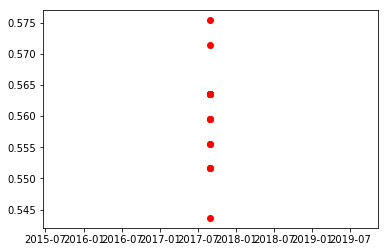

startedTrading OOS_annualizedReturn


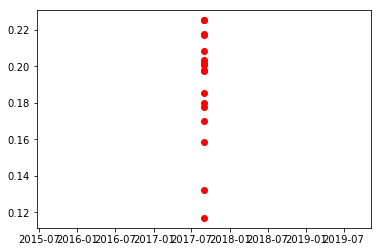

startedTrading OOS_free return


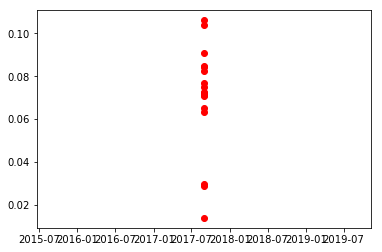

In [7]:
cm = pd.DataFrame(cleanedModels)
for col in cm.columns.values:
    if col == "tickers":
        continue
    try:
        import matplotlib.pyplot as plt
        groupsSharpe = cm.groupby([col])["OOS_profitability"].mean()
        if len(groupsSharpe) < 20:
            print(groupsSharpe)
            groupsSharpe = cm.groupby([col])["OOS_annualizedReturn"].mean()
            print(groupsSharpe)
            groupsSharpe = cm.groupby([col])["OOS_free return"].mean()
            print(groupsSharpe)
            
        print(col, "OOS_profitability")
        xVals = cm[[col]].values
        yVals = cm[["OOS_profitability"]].values
        plt.plot(xVals, yVals, 'ro')
        plt.show()
        
        print(col, "OOS_annualizedReturn")
        xVals = cm[[col]].values
        yVals = cm[["OOS_annualizedReturn"]].values
        plt.plot(xVals, yVals, 'ro')
        plt.show()
        
        print(col, "OOS_free return")
        xVals = cm[[col]].values
        yVals = cm[["OOS_free return"]].values
        plt.plot(xVals, yVals, 'ro')
        plt.show()
        plt.draw()
    except:
        continue
    



In [8]:
import dataAck
tData = dataAck.getTrainingData(params.tickerDataLookup)
joinedData = tData[0]

ATTEMPTING PULL ALL_TICKERS


In [9]:
def getDiscoveredPortfolioData(portfolioKey):
    storageClient = storage.Client('money-maker-1236')
    while True:
        try:
            bucket = storageClient.get_bucket(params.discoveredPortfolioCache)
            print("ATTEMPTING PULL", portfolioKey)
            blob = storage.Blob(portfolioKey, bucket)
            return pickle.loads(blob.download_as_string())
        except:
            return None
    pass

In [10]:
import empyrical
import dataAck
import portfolioGeneration
def getLimitedDataForPortfolio(tickerAllocationsTable, joinedData, factorToTrade= "VTI"):
    
    rawTickerPerformance = portfolioGeneration.calculatePerformanceForTable(tickerAllocationsTable, tickerAllocationsTable.columns, joinedData)
    
    rawTickerPerformance = rawTickerPerformance[~rawTickerPerformance.index.duplicated(keep='first')]
    

    rawAlgoPerformance = pd.DataFrame(rawTickerPerformance.apply(lambda x:sum(x), axis=1), columns=["Algo Return Without Commissions"])

    tickerPerformance, algoPerformance, algoTransactionCost =  portfolioGeneration.calculatePerformanceForAllocations(tickerAllocationsTable, joinedData)

    benchmark = factorToTrade
    factorReturn = dataAck.getDailyFactorReturn(benchmark, joinedData)
    factorReturn.columns = ["Factor Return (" + benchmark + ")"]
    algoPerformance.columns = ["Algo Return"]
    
    algoPerformanceRollingWeekly = algoPerformance.rolling(5, min_periods=5).apply(lambda x:empyrical.cum_returns(x)[-1]).dropna()
    algoPerformanceRollingWeekly.columns = ["Weekly Rolling Performance"]
    
    algoPerformanceRollingMonthly = algoPerformance.rolling(22, min_periods=22).apply(lambda x:empyrical.cum_returns(x)[-1]).dropna()
    algoPerformanceRollingMonthly.columns = ["Monthly Rolling Performance"]
    
    algoPerformanceRollingYearly = algoPerformance.rolling(252, min_periods=252).apply(lambda x:empyrical.cum_returns(x)[-1]).dropna()
    algoPerformanceRollingYearly.columns = ["Yearly Rolling Performance"]
    
    
    
    
    return algoPerformance.join(factorReturn), algoPerformanceRollingWeekly, algoPerformanceRollingMonthly, algoPerformanceRollingYearly

HRP BINARY 642 27
IS 0.7815984342913594 0.5525404157043879 0.2595327191932695 0.16821537312105758
OOS 1.2854288478153122 0.5515873015873016 0.2036561639950376 0.13088606428312272
ATTEMPTING PULL 161e7fc3d9e70151f270de94c613503f4a2d9d7d2ce46f424bb7137d
Weekly -0.100421243015 0.0047308001647 0.106459433583
Monthly -0.160521559404 0.0208378157027 0.161041154051
Yearly -0.178051674862 0.249985618582 0.646397820048


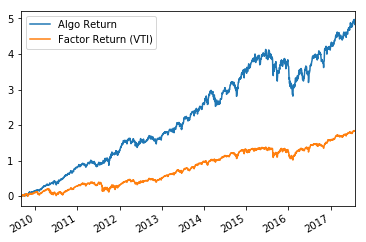

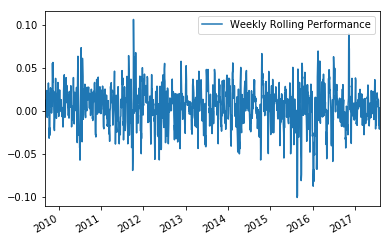

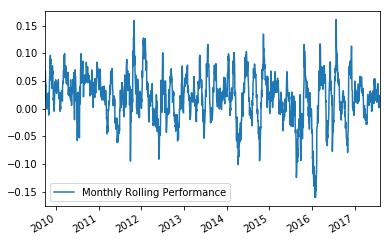

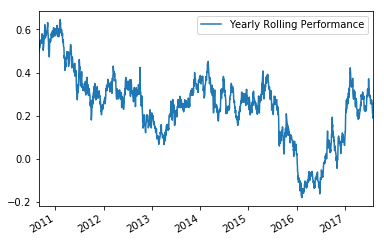

HRP FULL 680 31
IS 0.7604339778043396 0.5554272517321016 0.2544218784168255 0.15857725001770812
OOS 1.1797298161759944 0.5555555555555556 0.18006128294950274 0.10777438336222069
ATTEMPTING PULL 220ddc0d0290adfaa6355ecb3ccabcf9725f43caa55b3fd4348caba9
Weekly -0.10098440059 0.00460363085119 0.10135050472
Monthly -0.126586759673 0.0202987446848 0.146145225257
Yearly -0.161233957894 0.244471652229 0.649459087765


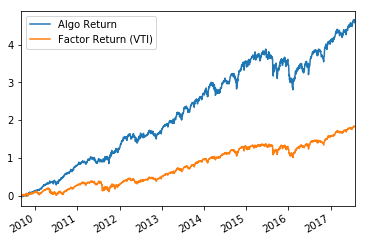

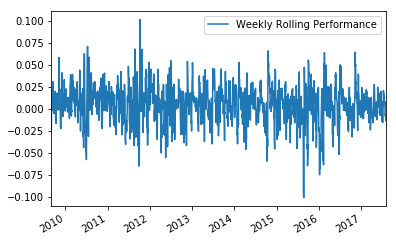

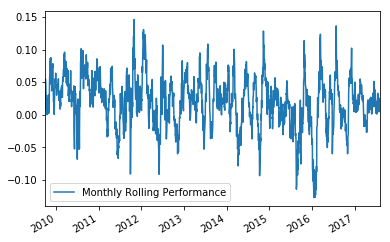

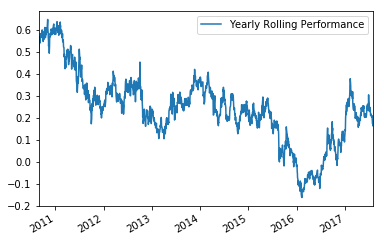

HRP FULL 621 22
IS 0.7607877936332674 0.5554272517321016 0.280639890595038 0.16463938177785556
OOS 1.186716679234022 0.5595238095238095 0.18547276994589335 0.1104416241718821
ATTEMPTING PULL 3129059dd600171cfc3a2cc840308cf2999a250463509a55797666b1
Weekly -0.101541484048 0.00498699461573 0.105099757067
Monthly -0.136007468138 0.0221721970442 0.151273246659
Yearly -0.162621736672 0.267026655918 0.744030264957


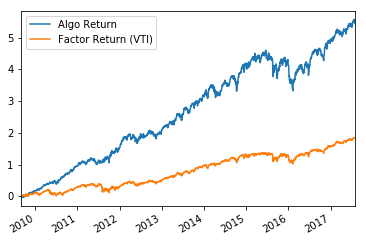

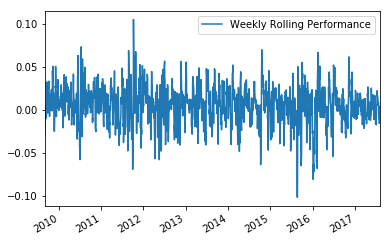

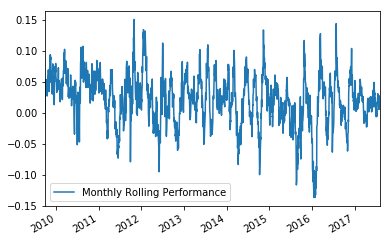

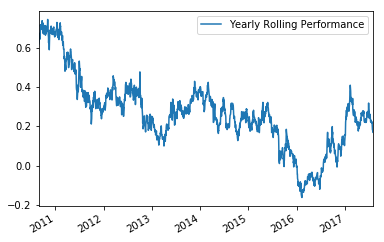

HRP BINARY 700 35
IS 0.7754120028096503 0.5577367205542725 0.23866974632127724 0.16179248979535113
OOS 1.2568649883352239 0.5634920634920635 0.20194549559699304 0.12525587920833722
ATTEMPTING PULL 3f9562ed92ee09f1eb6954502a04ce40bbf44e753696efce44d2a7c4
Weekly -0.100035446045 0.00442005777901 0.100558066052
Monthly -0.149417851978 0.0194508853188 0.15509721028
Yearly -0.169987591499 0.230766750893 0.601214094469


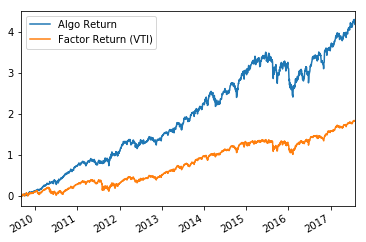

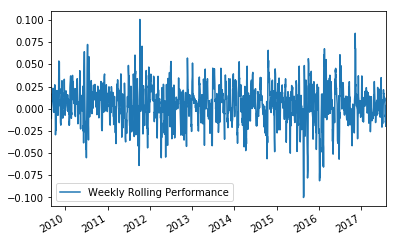

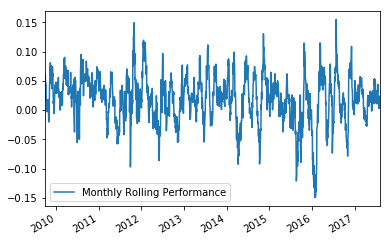

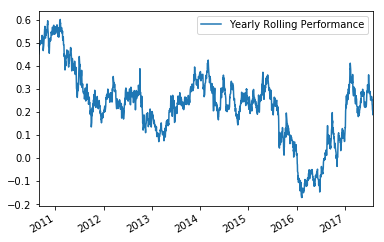

HRP FULL 535 21
IS 0.7285558899104064 0.5538284398388025 0.2753322219869918 0.16875413611066364
OOS 1.2526918392559467 0.5634920634920635 0.22516258437712677 0.11904276808111704
ATTEMPTING PULL 41fde9ef513f9e05ecd2183e55cc4e44493dc5753a38a8481354a89d
Weekly -0.100044717306 0.00504257039049 0.109643933354
Monthly -0.143143397524 0.0229104031143 0.159216903233
Yearly -0.170966944857 0.280160029281 0.854338602224


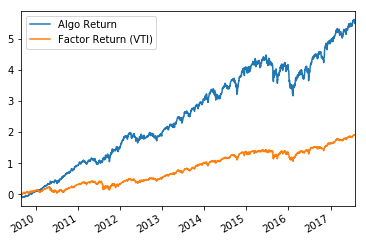

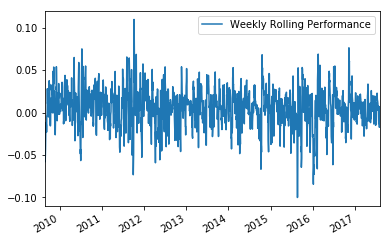

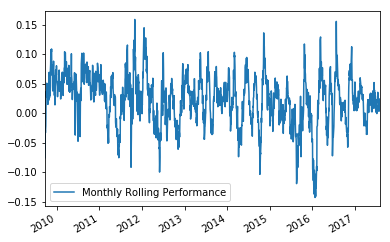

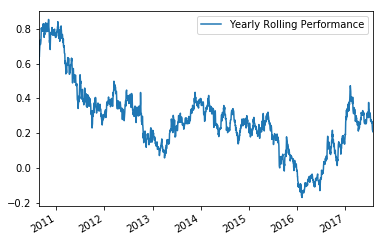

HRP FULL 698 34
IS 0.7694006049803755 0.5508083140877598 0.24731225802506218 0.158859346403885
OOS 1.1663519984326136 0.5595238095238095 0.17753370414817793 0.10614703454769417
ATTEMPTING PULL 4376e578b8ec5a873c99bbdab301bbc0b7afe07936696c7cc22d52e4
Weekly -0.100468960484 0.0044961294893 0.0979901871008
Monthly -0.129082573332 0.0201309707565 0.140995313039
Yearly -0.158324229774 0.241459805094 0.668287525005


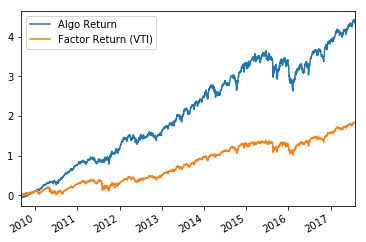

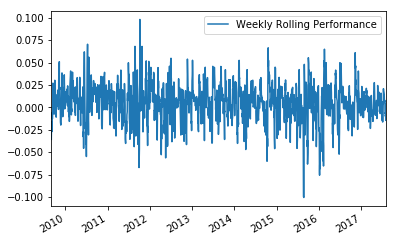

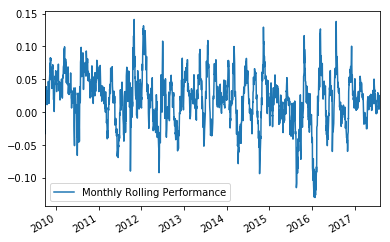

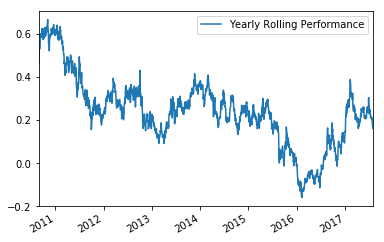

HRP FULL 697 32
IS 0.7752044566115085 0.5525404157043879 0.24235392603692008 0.15824813239793262
OOS 1.1502395569467694 0.5634920634920635 0.16980940950604873 0.10487952049157247
ATTEMPTING PULL 74220ebf03591ca750386c062f064cefdd0c10bee6d2d80e3220e2f8
Weekly -0.10000639516 0.00440949858077 0.0959835126347
Monthly -0.125434340204 0.0195727926197 0.138984905559
Yearly -0.154719225109 0.232911161247 0.612822967263


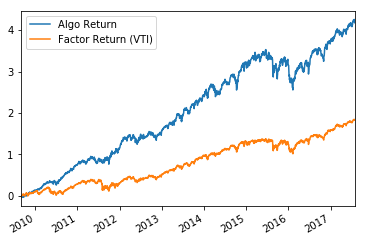

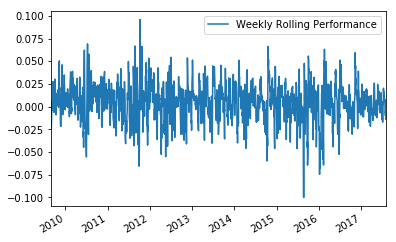

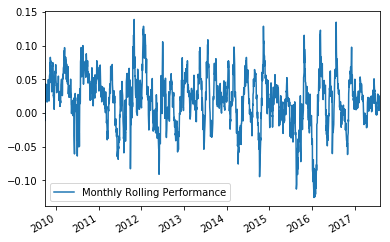

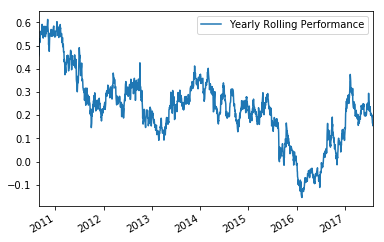

HRP FULL 529 31
IS 0.7635141481080856 0.5536951501154734 0.22476647383390835 0.1523686625104173
OOS 1.1222851546741266 0.5515873015873016 0.11697226848861919 0.1031185924222037
ATTEMPTING PULL 7424a5ed2594a1c4654c000f43d9c3bba056706664f1ead5d941b012
Weekly -0.10102788644 0.00403609382074 0.0925045138051
Monthly -0.13112732844 0.017615610419 0.145164317508
Yearly -0.161879070628 0.218771189674 0.476288651895


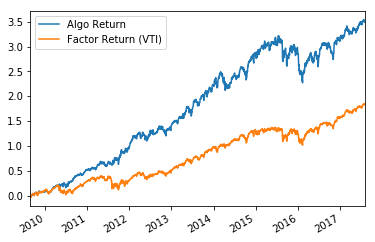

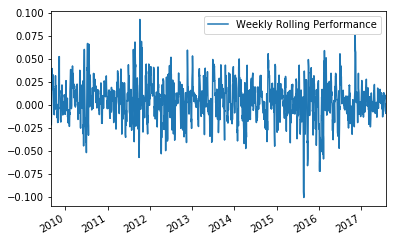

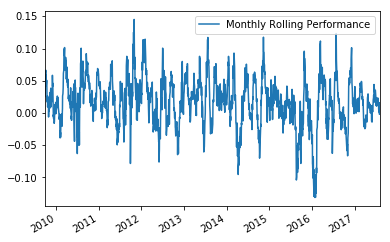

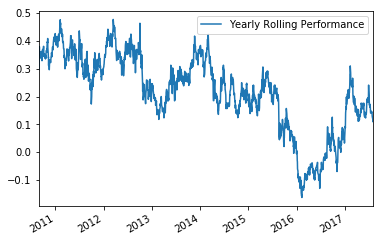

HRP FULL 552 23
IS 0.754996602209635 0.5531177829099307 0.2636626413898093 0.1658907480809907
OOS 1.2101918461846892 0.5753968253968254 0.2178648803818093 0.11381258483210964
ATTEMPTING PULL 7adb452e541924b1313f643bfdaeae10774efa5e06a2ef31b93d46df
Weekly -0.0996745525068 0.00484307849024 0.101706714112
Monthly -0.135710130027 0.0216900033348 0.14657528754
Yearly -0.168062010149 0.259909087075 0.778371849236


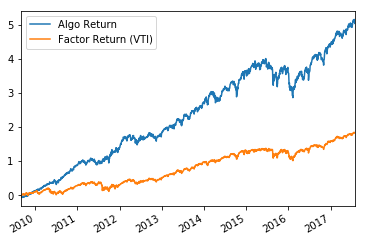

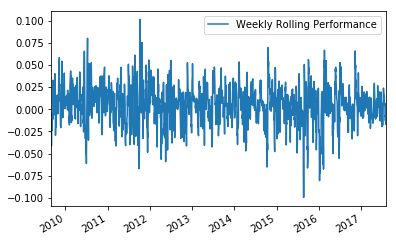

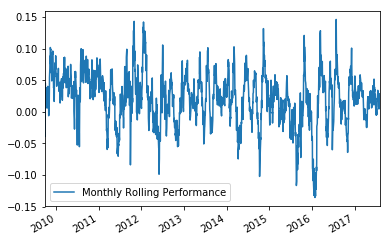

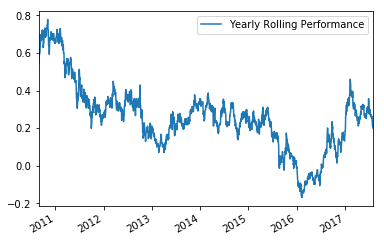

HRP BINARY 593 23
IS 0.7710841225605389 0.5513856812933026 0.2630456332572775 0.17150855368855805
OOS 1.3238335938644994 0.5595238095238095 0.21684920828367815 0.13202261546237581
ATTEMPTING PULL 7dcfe2f73424a2d62902c8dc238704fc6839fefcb63bbe29e87bd93d
Weekly -0.104557455508 0.00482834914462 0.10643017107
Monthly -0.157088392139 0.0213807436211 0.16032056055
Yearly -0.18523606344 0.253803777256 0.690233130791


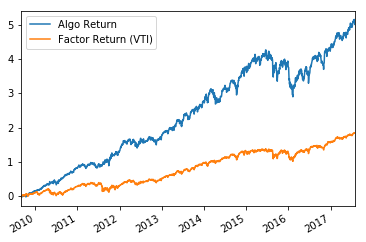

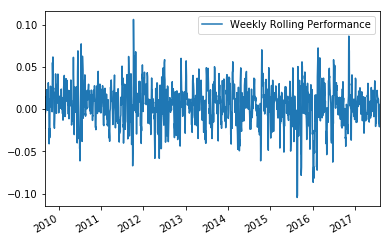

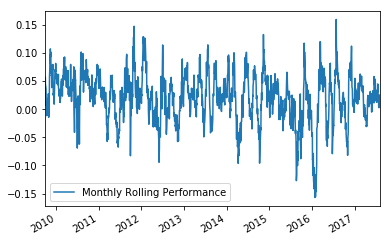

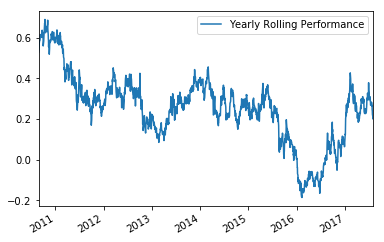

HRP BINARY 620 30
IS 0.8010779759221992 0.5525404157043879 0.2510167036149056 0.1704566815858318
OOS 1.3311646259346939 0.5515873015873016 0.22511284602967252 0.13425741050081957
ATTEMPTING PULL 84cf945a927a30d2f41b9fa93ffd09d7ad746531305b7162e877cec3
Weekly -0.107010068829 0.00466024077622 0.10266528899
Monthly -0.160814251542 0.0204875276717 0.161092648908
Yearly -0.186281811069 0.2422087763 0.615311510074


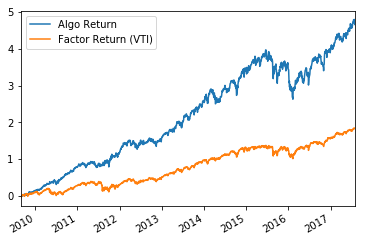

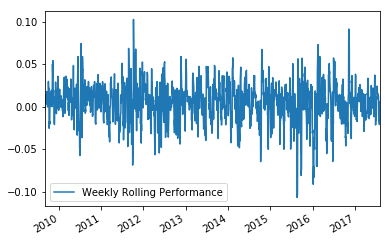

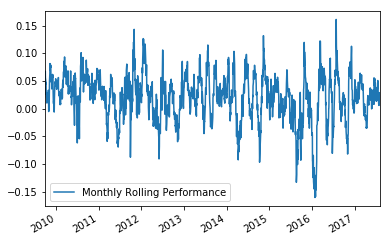

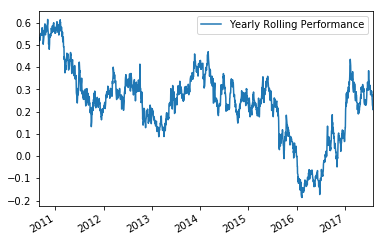

HRP BINARY 682 33
IS 0.7703088180473291 0.5548498845265589 0.2527508639765852 0.16311343800101427
OOS 1.2640166446298235 0.5634920634920635 0.1976523690732368 0.12684702026711334
ATTEMPTING PULL 9d424dbe9b705ab134249da62b4db00d58f1e2fb3f6748d9f7e7990b
Weekly -0.0996297566128 0.00461284358876 0.100842173777
Monthly -0.152217524768 0.0202539176999 0.157302452613
Yearly -0.172447584365 0.240983407825 0.636717506294


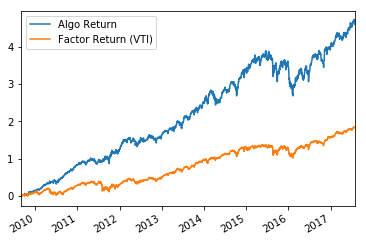

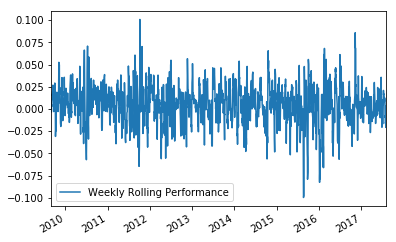

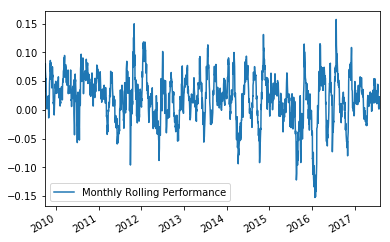

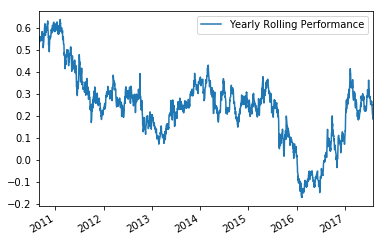

HRP BINARY 615 31
IS 0.7503482493183772 0.5594688221709007 0.25157677735132844 0.16110041992795818
OOS 1.2466880134169145 0.5634920634920635 0.2082169445452826 0.12384611480332067
ATTEMPTING PULL b4bc9faefc56176856dc0726c768bb360942c999cf31c9f6e81deaba
Weekly -0.0974966659949 0.0046155084769 0.10484238785
Monthly -0.151617907162 0.0203160690944 0.161094130578
Yearly -0.173383521873 0.242287809913 0.699311588357


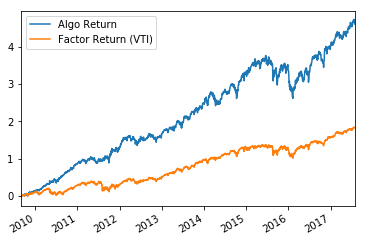

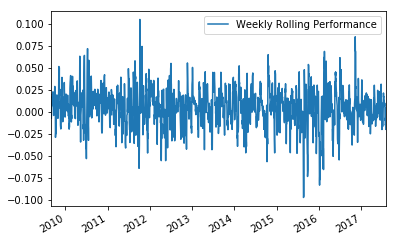

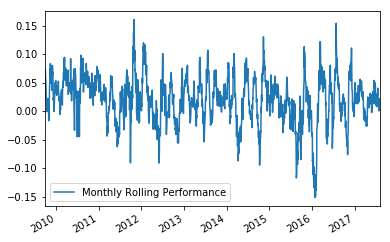

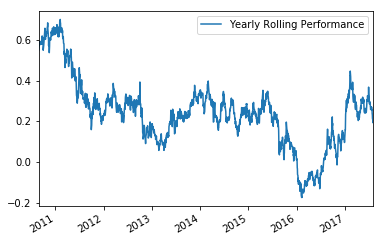

HRP FULL 542 34
IS 0.7545193260891992 0.5513856812933026 0.22067412542633447 0.1508067993190539
OOS 1.1257659716471504 0.5555555555555556 0.1324484826880421 0.10286865109799677
ATTEMPTING PULL b64d9ca706f97b2253520e7145b6d90de2f3f8f73d0fa747309db1dc
Weekly -0.100861093496 0.00400572223254 0.0933803763847
Monthly -0.126465277022 0.0176032292458 0.137854060339
Yearly -0.157483703847 0.214244257516 0.498361772467


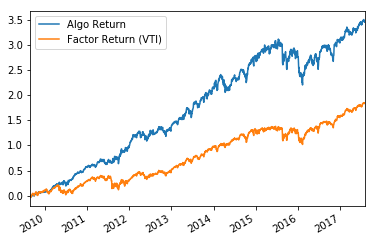

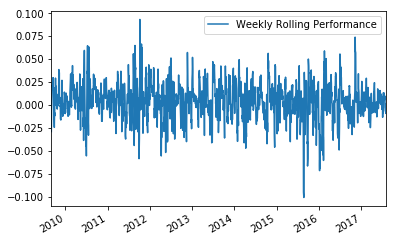

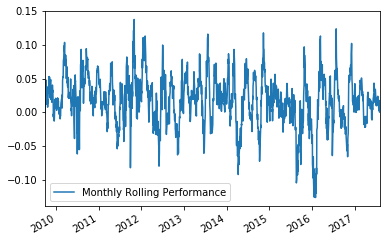

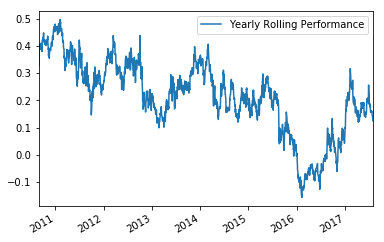

HRP BINARY 512 27
IS 0.751745398196052 0.5582857142857143 0.24017501075567038 0.1618060680060123
OOS 1.219689244032688 0.5714285714285714 0.15825388788170325 0.1293809010964146
ATTEMPTING PULL d77e61106be39a6ee8658a3f490552a0f258dc6dc6831e8048915c56
Weekly -0.0968693407496 0.00429367490451 0.104107429339
Monthly -0.163520489664 0.0189576719143 0.150638071576
Yearly -0.182571631602 0.228875067312 0.47254432


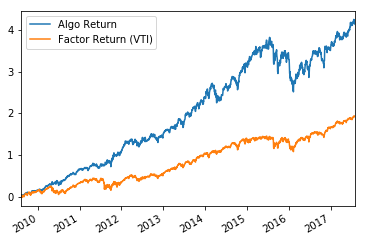

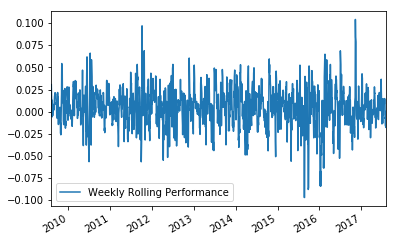

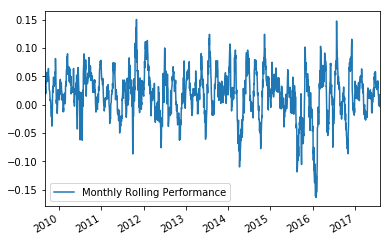

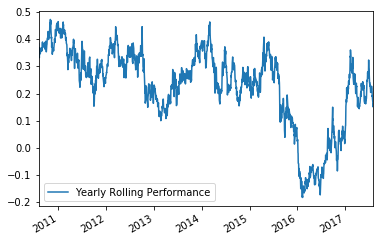

HRP BINARY 594 22
IS 0.8085303234572904 0.5555555555555556 0.2660648798519598 0.17349288321978776
OOS 1.2893142093483672 0.5436507936507936 0.20076609316771843 0.13750171084364318
ATTEMPTING PULL f2ec3d544180f41dd92a67853f64cf295238017b7465ef8a8da3f6a4
Weekly -0.101882578007 0.00486393287908 0.104064246036
Monthly -0.16589836627 0.0215109203027 0.165826321079
Yearly -0.178259290466 0.25807180707 0.650165752523


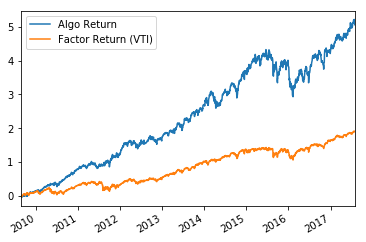

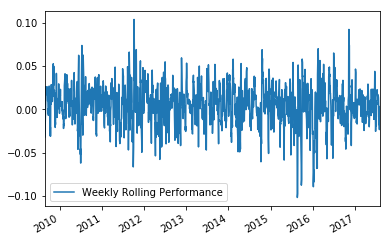

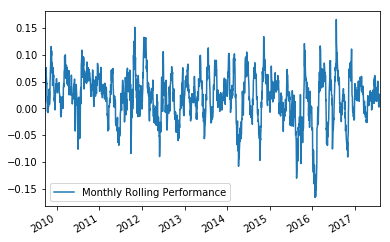

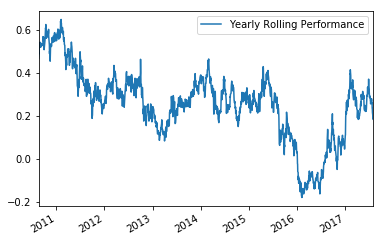

HRP FULL 576 23
IS 0.8016848987279657 0.5508083140877598 0.2618048980909067 0.16597959606338028
OOS 1.2291003507330163 0.5634920634920635 0.19817865005212165 0.11566055048465455
ATTEMPTING PULL f5828890c3802f35403bb553991c7da7849002b6d7201c81e5fe1c55
Weekly -0.102052760068 0.00476790472797 0.101087122703
Monthly -0.135377077241 0.0211973075586 0.143463152743
Yearly -0.164592233776 0.249689348972 0.665654238818


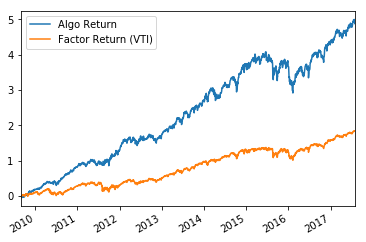

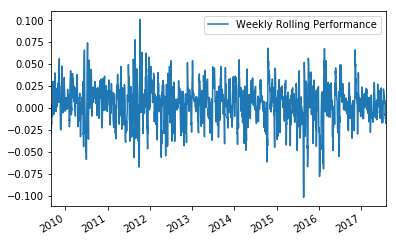

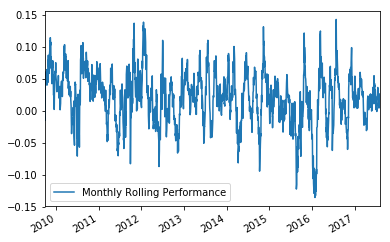

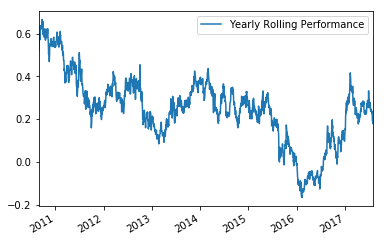

In [11]:
import matplotlib.pyplot as plt

%matplotlib inline
for mod in cleanedModels:
    try:
        print(mod["portfolioType"], mod['ALGORITHMS TRADED'], len(mod['tickers']))
        print("IS", mod["IS_beta"], mod["IS_profitability"], mod["IS_annualizedReturn"], mod["IS_annualizedVolatility"])
        print("OOS", mod["OOS_beta"], mod["OOS_profitability"], mod["OOS_annualizedReturn"], mod["OOS_annualizedVolatility"])
        tickerAllocationsTable, historicalWeights, historicalPredictions = getDiscoveredPortfolioData(mod["key"])
        algoPerformance, algoPerformanceRollingWeekly, algoPerformanceRollingMonthly, algoPerformanceRollingYearly = getLimitedDataForPortfolio(tickerAllocationsTable, joinedData)
        empyrical.cum_returns(algoPerformance).plot()
        algoPerformanceRollingWeekly.plot()
        print("Weekly", algoPerformanceRollingWeekly.min().values[0], algoPerformanceRollingWeekly.mean().values[0], algoPerformanceRollingWeekly.max().values[0])

        algoPerformanceRollingMonthly.plot()
        print("Monthly", algoPerformanceRollingMonthly.min().values[0], algoPerformanceRollingMonthly.mean().values[0], algoPerformanceRollingMonthly.max().values[0])

        algoPerformanceRollingYearly.plot()
        print("Yearly", algoPerformanceRollingYearly.min().values[0], algoPerformanceRollingYearly.mean().values[0], algoPerformanceRollingYearly.max().values[0])

        plt.show()
        plt.draw()
    except:
        continue